In [ ]:
import pandas as pd
df = pd.read_table('https://www.cs.carleton.edu/faculty/dmusican/cs321s12/titanic2.txt')
df

,pclass,age,sex,survived
0,1st,adult,male,yes
1,1st,adult,male,yes
2,1st,adult,male,yes
3,1st,adult,male,yes
4,1st,adult,male,yes
...,...,...,...,...
2196,crew,adult,female,yes
2197,crew,adult,female,yes
2198,crew,adult,female,no
2199,crew,adult,female,no


In [ ]:
df.nunique()

pclass      4
age         2
sex         2
survived    2
dtype: int64

pclass      4
age         2
sex         2
survived    2
dtype: int64

In [ ]:
df.isna().sum()

pclass      0
age         0
sex         0
survived    0
dtype: int64

In [ ]:
df.pclass.unique()

array(['1st', '2nd', '3rd', 'crew'], dtype=object)

In [ ]:
df.age.unique()

array(['adult', 'child'], dtype=object)

In [ ]:
df.sex.unique()

array(['male', 'female'], dtype=object)

In [ ]:
df.survived.unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df['pclass'] = df['pclass'].map({'crew': 0, '1st': 1, '2nd': 2, '3rd': 3})
df['age'] = df['age'].map({'child': 0, 'adult': 1})
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['survived'] = df['survived'].map({'no': 0, 'yes': 1})
df

,pclass,age,sex,survived
0,1,1,0,1
1,1,1,0,1
2,1,1,0,1
3,1,1,0,1
4,1,1,0,1
...,...,...,...,...
2196,0,1,1,1
2197,0,1,1,1
2198,0,1,1,0
2199,0,1,1,0


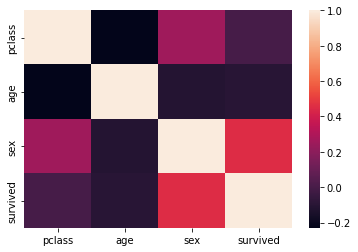

In [ ]:
import seaborn as sns
correlation = df.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns)

In [ ]:
x = df.iloc[:, 0:3]
x

,pclass,age,sex
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0
...,...,...,...
2196,0,1,1
2197,0,1,1
2198,0,1,1
2199,0,1,1


In [ ]:
y = df.iloc[:, 3:4]
y

,survived
0,1
1,1
2,1
3,1
4,1
...,...
2196,1
2197,1
2198,0
2199,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)
x_train

,pclass,age,sex
290,1,1,1
37,1,1,0
1214,3,1,1
2141,0,1,0
1311,3,0,1
...,...,...,...
789,3,1,0
968,3,1,0
1667,0,1,0
1688,0,1,0


In [ ]:
x_test

,pclass,age,sex
1574,0,1,0
1748,0,1,0
1833,0,1,0
876,3,1,0
1001,3,1,0
...,...,...,...
815,3,1,0
1865,0,1,0
1070,3,1,0
959,3,1,0


In [ ]:
y_train

,survived
290,1
37,1
1214,0
2141,0
1311,0
...,...
789,0
968,0
1667,0
1688,0


In [ ]:
y_test

,survived
1574,0
1748,0
1833,0
876,0
1001,0
...,...
815,0
1865,0
1070,0
959,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred = dtc.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7732426303854876

In [ ]:
depth = []
accuracy = []
for i in range(1, 6):
  depth.append(i)
  dtc = DecisionTreeClassifier(max_depth=i, random_state=0)
  dtc.fit(x_train, y_train)
  y_pred = dtc.predict(x_test)
  acc = accuracy_score(y_test, y_pred)
  accuracy.append(acc)
  print("Height: ", i)
  print("Accuracy: ", acc)

Height:  1
Accuracy:  0.7392290249433107
Height:  2
Accuracy:  0.7596371882086168
Height:  3
Accuracy:  0.7732426303854876
Height:  4
Accuracy:  0.7732426303854876
Height:  5
Accuracy:  0.7732426303854876


In [ ]:
print(depth)
print(accuracy)

[1, 2, 3, 4, 5]
[0.7392290249433107, 0.7596371882086168, 0.7732426303854876, 0.7732426303854876, 0.7732426303854876]


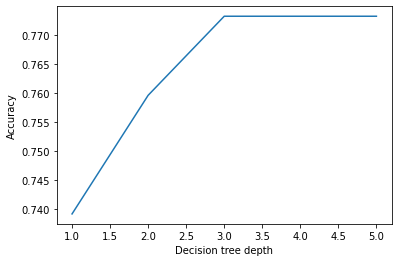

In [ ]:
import matplotlib.pyplot as plt
plt.plot(depth, accuracy)
plt.xlabel('Decision tree depth')
plt.ylabel('Accuracy')
plt.show()